Árboles de Clasificación --- 30:00 min
===

* 30:00 min | Ultima modificación: Abril 14, 2021 | [YouTube](https://youtu.be/NGzl54CSKZ8)

In [1]:
import warnings

warnings.filterwarnings("ignore")

En los tutoriales anteriore se han venido abordando diferentes algoritmos para resolver problemas de clasificación. En primer lugar, se abordo el algoritmo 1R que genera una frontera de decisión que es paralela a uno de los ejes coordenados. Luego se bordo el algoritmo KNN que asigna la clase con base en las clases de los k vecinos más cercanos. En este tutorial se abordarán los árboles de clasificación, los cuales pueden producir una partición compleja del espacio de entrada para realizar la clasificación.

## Descripción del problema

Se desea determinar a cuál clase ($A$, $B$, $C$) pertenece un elemento, a partir de resultados previamente recolectados.

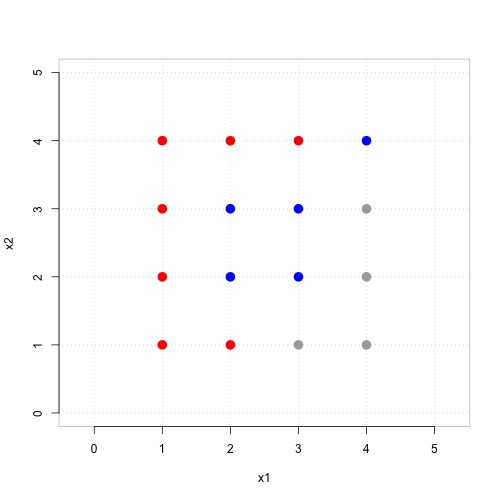Se tiene una muestra de 16 ejemplos para los cuales se han medido sus características $x_1$ y $x_2$ y su respectiva clase. Los puntos son presentados en la siguiente figura. Los puntos rojos representan la clase A, los azules la B, y finalmente, los grises la C.

![assets/tree-exercise.jpg](assets/tree-exercise.jpg)

Se desea determinar a que clase pertenece un nuevo punto con coordenadas $x_1$ y $x_2$.

In [2]:
%%writefile data.csv
x1,x2,y
1,1,A
1,2,A
1,3,A
1,4,A
2,1,A
2,2,B
2,3,B
2,4,A
3,1,C
3,2,B
3,3,B
3,4,A
4,1,C
4,2,C
4,3,C
4,4,B

Overwriting data.csv


## Metodología

La metodología de árboles de decisión se basa en la partición del espacio de entrada (las variables o características medibles) en regiones buscando separar en cada región un grupo de elementos que pertenecen a una clase particular. En la siguiente figura se tienen dos clases separables en un espacio de dos dimensiones ($x_1$ y $x_2$); haciendo la analogía con el problema real, los 1 podrían representar la clase A y los 2 las demás clases. En general, en un árbol de decisión se busca encontrar fronteras lineales paralelas a los ejes que permitan clasificar correctamente los datos. Para este ejemplo (figura izquierda), se podría decir que: 

$$\text{if } x_1~>~3 \Longrightarrow C=2 \text{  else  } C=1$$

Pero igualmente, es posible decir que (figura derecha):

$$\text{if } x_2~>~4 \Longrightarrow C=2 \text{  else  } C=1$$

![assets/rules1.jpg](assets/rules1.jpg)

Note que cada una de los dos regiones obtenidas puede seguir particionándose cuanto sea necesario. Este procedimiento se conoce como particionamiento recursivo y permite generar varias subregiones como las presentadas a continuación.

![assets/tree.jpg](assets/tree.jpg)

La figura anterior (izquierda) puede interpretarse como un conjunto de reglas if anidadas:

    if x2 > C then 
       class = azul
    else
       if x1 < A then
           class = verde
       else
           if x2 < B then 
               class = rojo
           else
               class = amarillo
           end if
       end if
    end if
    
Y estas reglas se pueden interpretar como el árbol de decision que aparece en la misma figura. Para decidir que región asignar a un nuevo punto ($x_1$, $x_2$) simplemente se recorre el árbol de decisión usando los valores $x_1$ y $x_2$.

## Algoritmo recursivo de particionamiento

El algoritmo de particionamiento opera de la siguiente manera. Se tienen únicamente dos atributos $x_1$ y $x_2$, y un total de $N$ ejemplos para construir el árbol. Para construir la primera instancia, se construyen todos los árboles posibles de profunidad 1 (un nodo). El primer árbol se construye usando como frontera de decisión el primer valor de $x_1$ en la muestra del ejemplo (véase la figura de abajo); el segundo árbol se construye con el segundo valor, y así sucesivamente. Una vez se recorren todos los valores de $x_1$, se recorren todos los valores de $x_2$ y así sucesivamente hasta agotar todas las variables explicativas (atributos).   

![assets/C50-rule1.jpg](assets/C50-rule1.jpg)

La mejor partición se escoje como aquella que clasifica el mayor número de ejemplos correctamente (o una métrica equivente) y se obtiene un primer árbol. Esto equivale a encontra la mejor partición de todo el espacio de características en dos regiones que clasifiquen de mejor forma los ejemplos usandos para el entrenamiento del modelo (véase la parte derecha de la figura anterior). En la figura anterior, se supone que la mejor clasificación se obtiene usando como punto de corte el dato `x1[4]`.

El algoritmo continua obteniendo una tercera región y para ello se debe decidir cuál de las dos regiones existentes se parte y en que orientación va dicho corte. El algoritmo prueba nuevamente cada punto del conjunto de datos como punto de corte de la siguiente manera: se hace `x1[1]` el nuevo punto de corte; si `x1[1]` está a la izquierda de `x1[4]`, se esta partiendo dicha región y por lo tanto se agrega esta nueva partición en la parte correspondiente de la regla (primera partición de la figura de abajo). Se hace `x1[2]` el nuevo punto de corte; si se asume que `x1[2]` esta a la derecha de `x1[4]` entonces se agrega a la parte `else` del modelo óptimo; se procede así sucesivamente hasta hasta obtener todos los modelos posibles con dos cortes. Asumiendo que el mejor corte se obtiene para `x2[6]`, el árbol queda como se presenta en el conjunto de reglas de la parte derecha de la siguiente figura.   

![assets/C50-rule2.jpg](assets/C50-rule2.jpg)

El proceso continua agregando un tercer corte, luego un cuarto y así sucesivamente. De ahí que el proceso se conozca como particionamiento recursivo.

Nótese que el proceso puede realizarse hasta que se asigne una región única a cada uno de los datos, lo que resulta erróneo ya que el modelo simplemente memoriza la información usada para el entrenamiento (explique que es esto!). El proceso de crecimiento del árbol de decisión puede deternerse asignando un máximo a la profundidad del árbol (early stoping) o limitando la cantidad mínima de puntos que puede contener una región (pre-pruning).

**Actividad.---** ¿Cómo se modifica el algoritmo descrito para introducir como restricción la cantidad mínima de puntos que debe tener una región?

**Actividad.---** ¿Cómo opera el algoritmo cuando las variables son categóricas?

Otra forma es permitir el crecimiento del árbol y luego proceder a reducir su tamaño eliminando regiones una a la vez (post-pruning). El algoritmo C5.0 permite el crecimiento del árbol hasta alcanzar el sobre entrenamiento del modelo y luego elimina los nodos (reglas if) que aportan poco al modelo.

**Actividad.---** Aplique el algoritmo a los datos propuestos al inicio de este tutorial y construya el árbol de decisión.

## Medida de la calidad del clasificador

**Impureza de Gini.---** En clasificación, mide la probabilidad de que un elemento escogido aleatoriamente de la muestra de datos, le sea asignada una clase incorrecta, de acuerdo con la distribución de clases en el conjunto de datos; esto es, se desea maximizar la probabilidad de que el patrón sea clasificado correctamente. Por tanto, se desea minimizar la probabilidad de asignar una clase errónea. 

Si se tienen $J$ clases, y si se denota como $p_i$ la probabilidad de ocurrencia de la clase $i$ (con $i \in \{1, ..., J\}$, la probabilidad de que a un elemento de la clase $i$ se le asigne otra clase es:

$$p_i \cdot \sum_{k\ne i} p_k$$

Ya que la función de impureza es computada sobre todas las clases, entonces:

$$
\begin{split}
G & = \sum_{i=1}^J \left( p_i \cdot \sum_{k\ne i} p_k \right) \\ \\
  & = \sum_{i=1}^J  p_i \cdot (1 - p_i)  \\ \\
  & = \sum_{i=1}^J  \left( p_i - p_i^2 \right)  \\ \\
  & = \left(\sum_{i=1}^J p_i \right) - \left(\sum_{i=1}^J p_i^2 \right) \\ \\
  & = 1 - \sum_{i=1}^J p_i^2
\end{split}
$$

En términos prácticos, el siguiente nodo a particionar es el que genera la máxima reducción del índice de Gini.

**Entropia.---** Se basa en el concepto de ganancia de información, y en términos prácticos, se selecciona el nodo a particionar, como aquel que generare la máxima ganancia de información.

## Solución numérica

In [3]:
import pandas as pd

#
# Lectura de datos
#
df = pd.read_csv(
    "data.tsv",
    sep="\t",        # separador de campos
    thousands=None,  # separador de miles para números
    decimal=".",     # separador de los decimales para números
)  

In [4]:
#
# Construcción del arbol de clasificación
#
from sklearn.tree import DecisionTreeClassifier

#
# Se construye el arbol
#
clf = DecisionTreeClassifier(
    criterion="gini",
    splitter="best",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,
)

#
# Se entrena para los datos de prueba
#
X = df[["x1", "x2"]].values
clf.fit(X, df.y.values)

#
# Se pronostica para la muestra de prueba
#
df["y_pred_python"] = clf.predict(X)
df

,x1,x2,y,y_pred_python
0,1,1,A,A
1,1,2,A,A
2,1,3,A,A
3,1,4,A,A
4,2,1,A,A
5,2,2,B,B
6,2,3,B,B
7,2,4,A,A
8,3,1,C,C
9,3,2,B,B


In [5]:
#
# Graficación del árbol
#
import pydotplus
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz


def display_tree(clf):

    dot_data = StringIO()
    export_graphviz(
        clf,
        out_file=dot_data,
        filled=True,
        rounded=True,
        special_characters=True,
    )

    return pydotplus.graph_from_dot_data(dot_data.getvalue()).create_png()

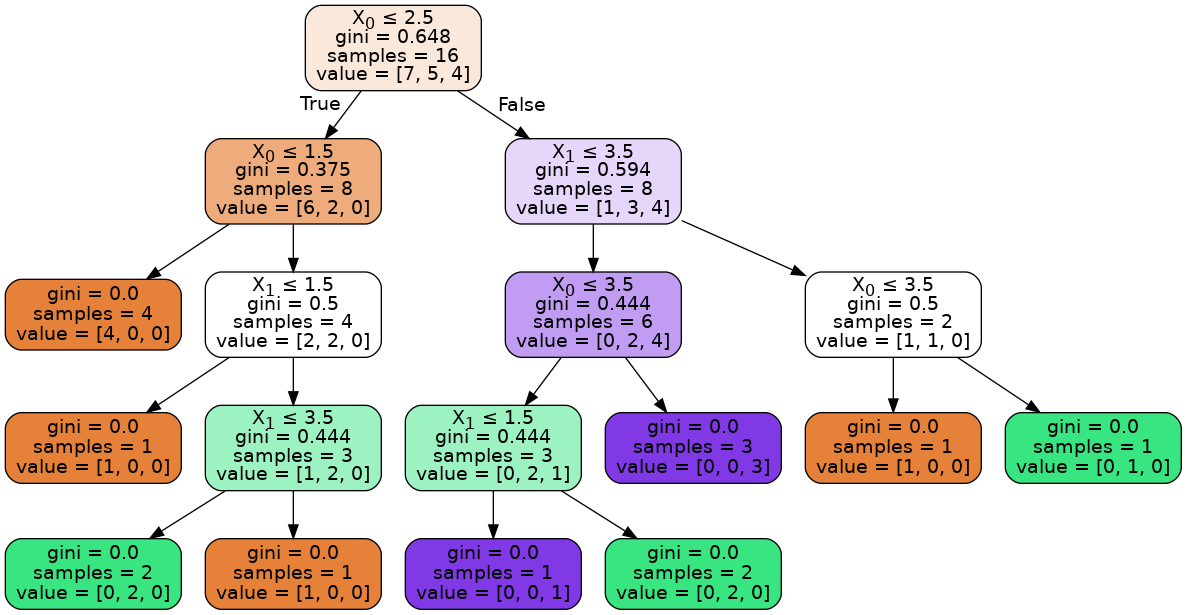

In [6]:
Image(display_tree(clf))

In [7]:
#
# Métricas de desempeño
#
from sklearn.metrics import confusion_matrix

confusion_matrix(df.y, df.y_pred_python)

array([[7, 0, 0],
       [0, 5, 0],
       [0, 0, 4]])